## Week 1

Coding tasks:  
1. get and begin cleaning data  
    * `import pandas as pd`  
    *  Create a DataFrame, `ha_costs_df`, from the `mmd_heart_attack_data.csv` file.   
        - Examine the first 5 rows and the last five rows of the TN heart attack  data.  
        - Check the data types of each column by using `.info`.  
        - Keep only the rows where facilities are in TN.    
        - Print the dimensions of the data. How many TN counties are represented in the heart attack costs data?
        - How many counties are classified as Urban? How many as Rural?
        - Examine the distribution of costs (contained in the `analysis_value` column).
        - Does there appear to be a difference in costs between Urban counties and Rural counties?
    * Create a DataFrame, `cancer_costs_df`, from the `mmd_cancer_data.csv` file.  
        - Look at the head and tail of the DataFrame.  
        - Print the shape of the `cancer_costs_df`.  
        - Keep only the rows where facilities are in TN.  
        - Print the dimensions of the data. How many TN counties are represented in the cancer costs data?
        - You should have found that the datasets have a different number of counties. Which counties are missing from one of the datasets?
        - Examine the distribution of costs.
    * Create a DataFrame, `income_df`, from the IRS CSV file.
        - Keep only the data that pertains to Tennessee.  
        - Look at the head and the tail  
        - Print the shape  
        - Keep only the following columns:  `['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']`  
        - rename those columns: `['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']`  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Heart attack data

In [2]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]

In [3]:
ha_costs_df= pd.read_csv('../data/mmd_heart_attack_data.csv', na_values = missing_values)

Examine the first and last 5 rows 

In [4]:
ha_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [5]:
ha_costs_df.state.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'PUERTO RICO'],
      dtype=object)

In [6]:
#Keep only the rows where facilities are in TN
ha_costs_df_TN = ha_costs_df.query('state == "TENNESSEE"')
ha_costs_df_TN.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661


In [7]:
#Print the dimensions of the data. How many TN counties are represented in the heart attack costs data?
ha_costs_df_TN.shape

(91, 17)

In [8]:
ha_costs_df_TN['county'].nunique()

91

In [9]:
#my_list = ['Urban', 'Rural']
#ha_costs_df_TN = ha_costs_df_TN.query("urban in @my_list")

In [10]:
#How many counties are classified as Urban? 
ha_costs_df_TN_urban = ha_costs_df_TN.query('urban == "Urban"')
ha_costs_df_TN_urban.shape

(38, 17)

In [11]:
#How many as Rural?
ha_costs_df_TN_rural = ha_costs_df_TN.query('urban == "Rural"')
ha_costs_df_TN_rural.shape

(53, 17)

In [12]:
ha_costs_df_TN.urban.value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

In [13]:
# Examine the distribution of costs (contained in the `analysis_value` column).
print('Costs for urban counties:')
print(ha_costs_df_TN.loc[ha_costs_df_TN.urban == 'Urban'].analysis_value.describe())
print('====================================')
print('Costs for rural counties:')
print(ha_costs_df_TN.loc[ha_costs_df_TN.urban == 'Rural'].analysis_value.describe())

Costs for urban counties:
count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64
Costs for rural counties:
count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
50%      45384.000000
75%      48998.000000
max      62641.000000
Name: analysis_value, dtype: float64


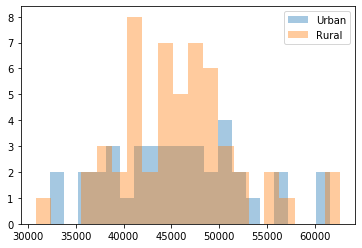

In [14]:
Urban=plt.hist(ha_costs_df_TN_urban['analysis_value'], alpha=0.4, bins=20, label='Urban')
Rural=plt.hist(ha_costs_df_TN_rural['analysis_value'], alpha=0.4, bins=20, label='Rural')
plt.legend()

# Cancer data

In [15]:
cancer_costs_df= pd.read_csv('../data/mmd_cancer_data.csv', na_values = missing_values)

In [16]:
cancer_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151


In [17]:
cancer_costs_df.tail(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [18]:
#Print the shape of the `cancer_costs_df`
cancer_costs_df.shape

(3165, 17)

In [19]:
#Keep only the rows where facilities are in TN
cancer_costs_df_TN=cancer_costs_df.query('state == "TENNESSEE"')

In [20]:
#Print the dimensions of the data. How many TN counties are represented in the cancer costs data?
cancer_costs_df_TN.shape

(95, 17)

In [21]:
cancer_costs_df_TN['county'].nunique()

95

### The datasets have a different number of counties. Which counties are missing from one of the datasets?

In [22]:
cancer_costs_df_TN[~cancer_costs_df_TN.county.isin(ha_costs_df_TN.county)]

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2429,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47067,Hancock County,TENNESSEE,Rural,All,undefined,22515
2459,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47127,Moore County,TENNESSEE,Rural,All,undefined,16978
2464,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47137,Pickett County,TENNESSEE,Rural,All,undefined,16768
2483,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47175,Van Buren County,TENNESSEE,Rural,All,undefined,16244


In [23]:
# we can also create a list of counties in each dataset and use the set difference() method
cancer_counties = list(cancer_costs_df_TN.county.unique())
ha_counties = list(ha_costs_df_TN.county.unique())

list(set(cancer_counties).difference(ha_counties))

['Hancock County', 'Moore County', 'Van Buren County', 'Pickett County']

No handles with labels found to put in legend.


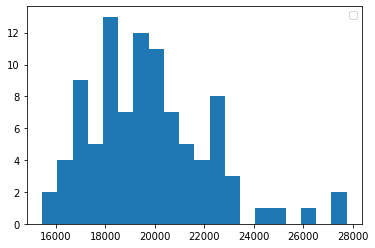

In [24]:
#Examine the distribution of costs.
plt.hist(cancer_costs_df_TN['analysis_value'], bins=20)
plt.legend()

#  IRS data

In [25]:
income_df=pd.read_csv("../data/irs_county_2016.csv")

Keep only the data that pertains to Tennessee. 

In [26]:
 income_df_TN=income_df.query('STATE == "TN"')

In [27]:
#Look at the head and the tail 
income_df_TN.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [28]:
#Print the shape 
income_df_TN.shape

(768, 148)

In [29]:
#Keep only the following columns:  `['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']`  
income_df_TN_subset= income_df_TN.loc[income_df_TN['COUNTYNAME']== 'Tennessee',['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

In [30]:
income_df_TN = income_df_TN[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
income_df_TN.head(2)

,STATE,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,N2,NUMDEP,ELDERLY,A00100,N02650,A02650,N02300,A02300
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


In [31]:
#rename those columns: `['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']`  
income_df_TN.columns=['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']


In [32]:
#check renamed columns
income_df_TN.columns

Index(['state', 'county', 'income_bucket', 'return_count', 'single_returns',
       'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents',
       'elderly', 'agi', 'returns_with_total_inc', 'total_inc_amt',
       'returns_with_unemployment', 'unemployment_comp'],
      dtype='object')

In [33]:
income_df_TN.shape

(768, 15)

#### Create `income_dict`, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions 

In [34]:
income_dict = {0:'Total', 1: 'Under $1', 2: 'Between 1 and $10,000', 3: 'Between 10,000 and $25,000',
              4: 'Between 25,000 and $50,000', 5: 'Between 50,000 and $75,000', 
               6: 'Between 75,000 and $100,000', 7: 'Between 100,000 and $200,000', 
               8:'$200,000 or more'}

#### Pass the dictionary as an argument to the pandas `replace()` method to change the `income_bucket` column so that it uses descriptive text instead of the numeric code.

In [35]:
income_df_TN.income_bucket=income_df_TN.income_bucket.replace(income_dict)

In [36]:
income_df_TN.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


#### Use the pandas `groupby()` method to group the data by county and get the `sum()` of all numeric columns for that county. Be sure to also `reset_index()` so that our aggregated data is re-indexed to begin at 0. Save this as a DataFrame called `income_county_agg`, and look at the first few rows.

In [37]:
#Use the pandas `groupby()` method to group the data by county
#income_df_TN_subset_county = income_df_TN_subset.groupby('county') 

In [38]:
#re-indexed to begin at 0 and save as df income_county_agg
income_county_agg = income_df_TN.groupby('county').agg('sum').reset_index()
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


##### Week 3:

Creating new columns from existing columns
 - For loops and list comprehensions
 - Using the df.iterrows() method to iterate through a DataFrame
  

Coding Task:
1. Write a for-loop to iterate through the `income_county_agg` DataFrame and create a list of average incomes for each county. Assign this list to a new column in `income_county_agg` called `avg_income`. 
    - First create an empty list called `avg_inc_list` 
    - Begin the for-loop to iterate through `income_county_agg` 
    - Store the row's total income in a variable called `income`. Remember to multiply total income by 1000 before storing it in order to get the actual amount.
    - Store each row's `return_count` in a variable called `count`.
    - divide `income` by `count`, round it to the nearest whole number, and `append` it to `avg_inc_list`.
    - Assign `avg_income_list` to a new column in `income_county_agg` called `avg_income`.

In [39]:
avg_inc_list = []
for row in income_county_agg.iterrows():
    vals = row[1]
    income = vals['total_inc_amt'] * 1000 
    count = vals['returns_with_total_inc']
    avg_inc_list.append(round(income/count, 0))

income_county_agg['avg_income'] = avg_inc_list
income_county_agg = income_county_agg.sort_values('avg_income', ascending = False)
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0
46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0
32,Hamilton County,164170,75180,61490,23840,312800,97450,40590,11249180,163590,11427589,3560,11502,69855.0
23,Fayette County,19030,7510,7910,3190,37250,11450,5510,1289529,18970,1312112,420,1310,69168.0


In [40]:
income_county_agg['avg_income2'] = round(income_county_agg.total_inc_amt * 1000 / income_county_agg.returns_with_total_inc, 0)
income_county_agg.head(3)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income,avg_income2
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0,71028.0
46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0,70189.0


##### Week 4:
Exploratory Data Analysis
- Understanding variable types and assessing missingness
- Use `df.describe()` to begin to get to know your data
- Visualization as a tool for exploration
- Introduction to `matplotlib.pyplot` and `seaborn`
  
  
 Coding tasks:  
  1. Find which datasets have missing values? How many? What should you do about it? 
  2. Create a barplot that shows the average income for each county. Be sure your plot stands alone and is labeled to identify any units.

  3. Create two more barplots: one to show the total cost of a heart attack by county and the other to show the total cost of cancer by county

  4. Create a second DataFrame for `tn_ha_costs` - you can name it `tn_ha_costs2` or something similar - keeping just these four columns:`county`, `urban`, `analysis_value`, `avg_income`. Create a `cost_income_ratio` column to compare the total cost (`analysis_value`) to the average annual income. Use the `describe()` function to see the statistical description of the ratio. Repeat this for the cancer dataset.

  5. Create additional plots to investigate the data (for example, you might color the bars by urban vs rural counties; merge the cancer and heart attack cost data and create scatterplots to see if the total cost for cancer is correlated with the total cost for heart attacks, etc.)

In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income,avg_income2
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0,71028.0
46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0,70189.0
32,Hamilton County,164170,75180,61490,23840,312800,97450,40590,11249180,163590,11427589,3560,11502,69855.0,69855.0
23,Fayette County,19030,7510,7910,3190,37250,11450,5510,1289529,18970,1312112,420,1310,69168.0,69168.0


In [43]:
income_county_agg.describe()

,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income,avg_income2
count,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,9.600000e+01,9.600000e+01,96.000000,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.000000,96.000000,96.000000
mean,6.231292e+04,2.784948e+04,2.344719e+04,9678.750000,1.216117e+05,3.970583e+04,14377.187500,3.633602e+06,6.209438e+04,3.692724e+06,1393.020833,4296.875000,47975.656250,47975.656250
std,3.083194e+05,1.384475e+05,1.151333e+05,48619.626971,6.009662e+05,1.968221e+05,70799.305954,1.808702e+07,3.072402e+05,1.838238e+07,6819.701355,21119.115406,11758.285418,11758.285418
min,2.100000e+03,8.200000e+02,6.200000e+02,230.000000,4.100000e+03,1.190000e+03,550.000000,7.321100e+04,2.100000e+03,7.394100e+04,50.000000,161.000000,32717.000000,32717.000000
25%,6.980000e+03,2.690000e+03,2.990000e+03,985.000000,1.416000e+04,4.532500e+03,1837.500000,2.889170e+05,6.950000e+03,2.925508e+05,237.500000,707.250000,42053.250000,42053.250000
50%,1.316500e+04,5.425000e+03,5.490000e+03,2160.000000,2.609000e+04,8.095000e+03,3315.000000,5.806640e+05,1.312000e+04,5.899845e+05,420.000000,1222.500000,44742.000000,44742.000000
75%,2.499750e+04,1.029250e+04,1.058750e+04,3920.000000,4.906750e+04,1.561750e+04,6462.500000,1.265090e+06,2.490750e+04,1.281446e+06,675.000000,2085.500000,50800.500000,50800.500000
max,2.990850e+06,1.336600e+06,1.125320e+06,464380.000000,5.837230e+06,1.905770e+06,689890.000000,1.744129e+08,2.980370e+06,1.772508e+08,66730.000000,206250.000000,130072.000000,130072.000000


In [44]:
ha_costs_df_TN.isna().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [45]:
cancer_costs_df_TN.isna().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [46]:
income_county_agg.isna().sum()

county                       0
return_count                 0
single_returns               0
joint_returns                0
head_of_house_returns        0
exemptions                   0
dependents                   0
elderly                      0
agi                          0
returns_with_total_inc       0
total_inc_amt                0
returns_with_unemployment    0
unemployment_comp            0
avg_income                   0
avg_income2                  0
dtype: int64

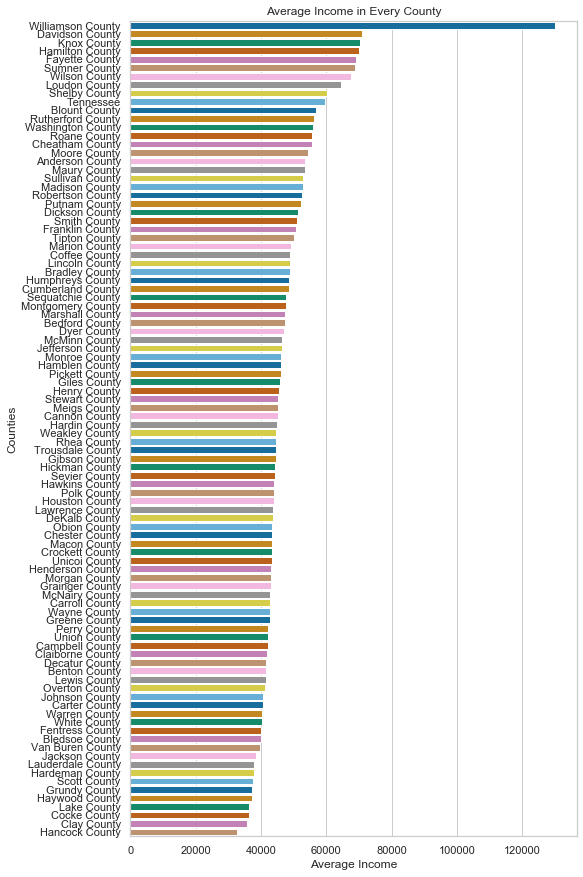

In [47]:
plt.figure(figsize = (8, 15))
sns.set(style="whitegrid")
sns.barplot('avg_income','county', data = income_county_agg, palette = 'colorblind')
plt.xlabel('Average Income')
plt.ylabel('Counties')
plt.title('Average Income in Every County');

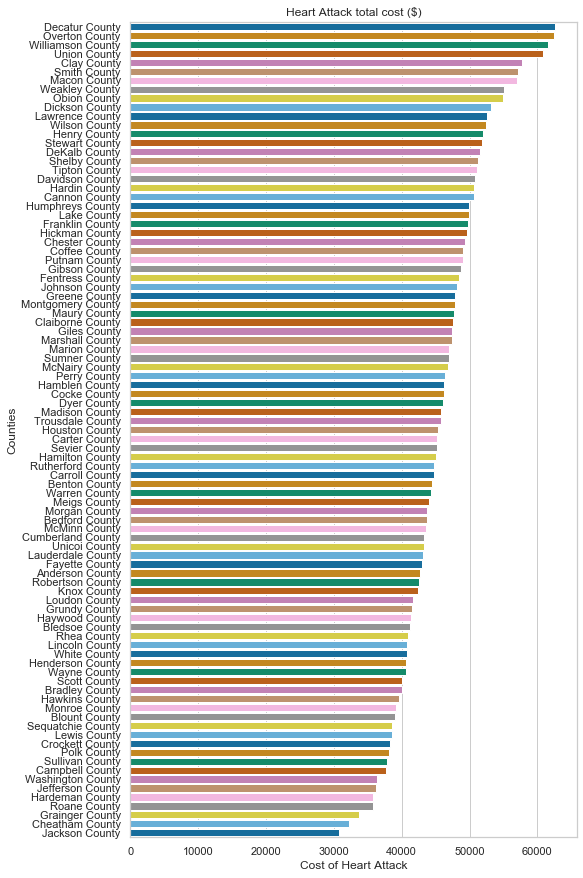

In [48]:
#Create barplots: one to show the total cost of a heart attack by county

ha_costs_df_TN = ha_costs_df_TN.sort_values('analysis_value', ascending = False)
plt.figure(figsize = (8, 15))
sns.set(style="whitegrid")
sns.barplot('analysis_value','county', data = ha_costs_df_TN, palette = 'colorblind')
plt.xlabel('Cost of Heart Attack')
plt.ylabel('Counties')
plt.title('Heart Attack total cost ($)');

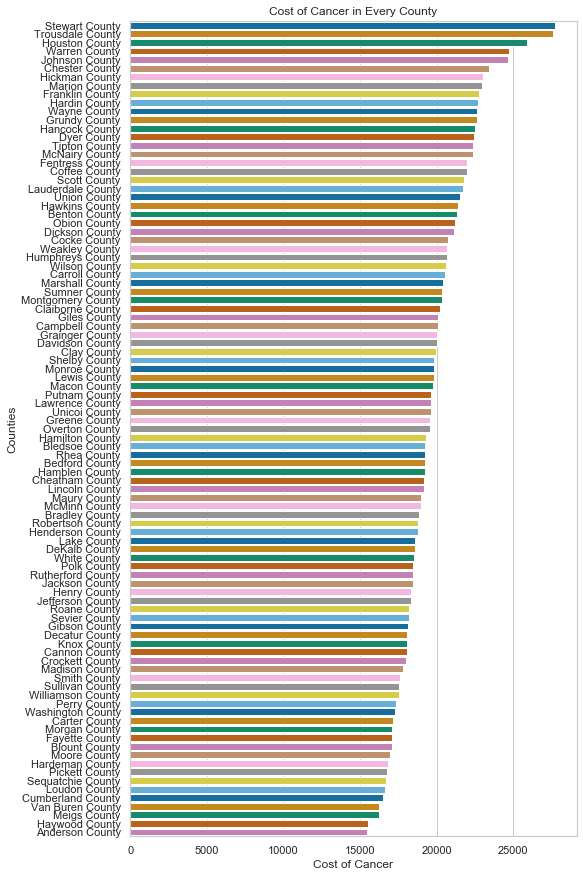

In [49]:
#show the total cost of cancer by county

cancer_costs_df_TN = cancer_costs_df_TN.sort_values('analysis_value', ascending = False)
plt.figure(figsize = (8, 15))
sns.set(style="whitegrid")
sns.barplot('analysis_value','county', data = cancer_costs_df_TN, palette = 'colorblind')
plt.xlabel('Cost of Cancer')
plt.ylabel('Counties')
plt.title('Cost of Cancer in Every County');

#### Create a second DataFrame for tn_ha_costs - you can name it tn_ha_costs2 or something similar - keeping just these four columns:county, urban, analysis_value, avg_income. 

In [50]:
tn_ha_costs = ha_costs_df_TN[['county', 'urban', 'analysis_value']]
tn_ha_costs.head()


,county,urban,analysis_value
2049,Decatur County,Rural,62641
2094,Overton County,Rural,62486
2119,Williamson County,Urban,61541
2113,Union County,Urban,60785
2043,Clay County,Rural,57705


In [51]:
county_incomes = income_county_agg[['county', 'avg_income']]
county_incomes.head(2)

,county,avg_income
94,Williamson County,130072.0
18,Davidson County,71028.0


In [52]:
tn_ha_costs2=pd.merge(tn_ha_costs, county_incomes, on= 'county', how = 'left')
tn_ha_costs2.head()

,county,urban,analysis_value,avg_income
0,Decatur County,Rural,62641,41512.0
1,Overton County,Rural,62486,41100.0
2,Williamson County,Urban,61541,130072.0
3,Union County,Urban,60785,42048.0
4,Clay County,Rural,57705,35658.0


In [53]:
tn_ha_costs2.head()

,county,urban,analysis_value,avg_income
0,Decatur County,Rural,62641,41512.0
1,Overton County,Rural,62486,41100.0
2,Williamson County,Urban,61541,130072.0
3,Union County,Urban,60785,42048.0
4,Clay County,Rural,57705,35658.0


In [54]:
tn_ha_costs2['cost_income_ratio'] = tn_ha_costs2.analysis_value / tn_ha_costs2.avg_income
tn_ha_costs2.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273
std,6574.670462,11859.019531,0.214552
min,30831.000000,35658.000000,0.473130
25%,41105.500000,42358.500000,0.850326
50%,45384.000000,44666.000000,1.001318
75%,49698.500000,50494.500000,1.117770
max,62641.000000,130072.000000,1.618290


### Repeat for cancer data

In [55]:
# we only need county, urban, and analysis_value columns from the cancer costs
tn_cancer_costs = cancer_costs_df_TN[['county', 'urban', 'analysis_value']]
tn_cancer_costs.head()

,county,urban,analysis_value
2476,Stewart County,Urban,27740
2480,Trousdale County,Urban,27602
2437,Houston County,Rural,25909
2484,Warren County,Rural,24699
2441,Johnson County,Rural,24647


In [56]:
tn_cancer_costs2 = pd.merge(tn_cancer_costs, county_incomes, on= 'county', how = 'left')
tn_cancer_costs2.head(2)

,county,urban,analysis_value,avg_income
0,Stewart County,Urban,27740,45266.0
1,Trousdale County,Urban,27602,44579.0


In [57]:
tn_cancer_costs2['cost_income_ratio'] = tn_cancer_costs2.analysis_value / tn_cancer_costs2.avg_income
tn_cancer_costs2.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Stewart County,Urban,27740,45266.0,0.612822
1,Trousdale County,Urban,27602,44579.0,0.619170
2,Houston County,Rural,25909,43913.0,0.590008
3,Warren County,Rural,24699,40462.0,0.610425
4,Johnson County,Rural,24647,40696.0,0.605637


In [58]:
tn_cancer_costs2.describe()

,analysis_value,avg_income,cost_income_ratio
count,95.000000,95.000000,95.000000
mean,19757.894737,47854.631579,0.430497
std,2436.304533,11760.400939,0.097032
min,15454.000000,32717.000000,0.134748
25%,18103.500000,42051.500000,0.362230
50%,19563.000000,44666.000000,0.428809
75%,21153.000000,50494.500000,0.480751
max,27740.000000,130072.000000,0.688174


### Comparing urban and rural costs

In [59]:
#subset urban and rural in ha data and sort them
urban_ha = tn_ha_costs2.loc[tn_ha_costs2.urban == 'Urban'].sort_values('cost_income_ratio', ascending = False)
rural_ha = tn_ha_costs2.loc[tn_ha_costs2.urban == 'Rural'].sort_values('cost_income_ratio', ascending = False)

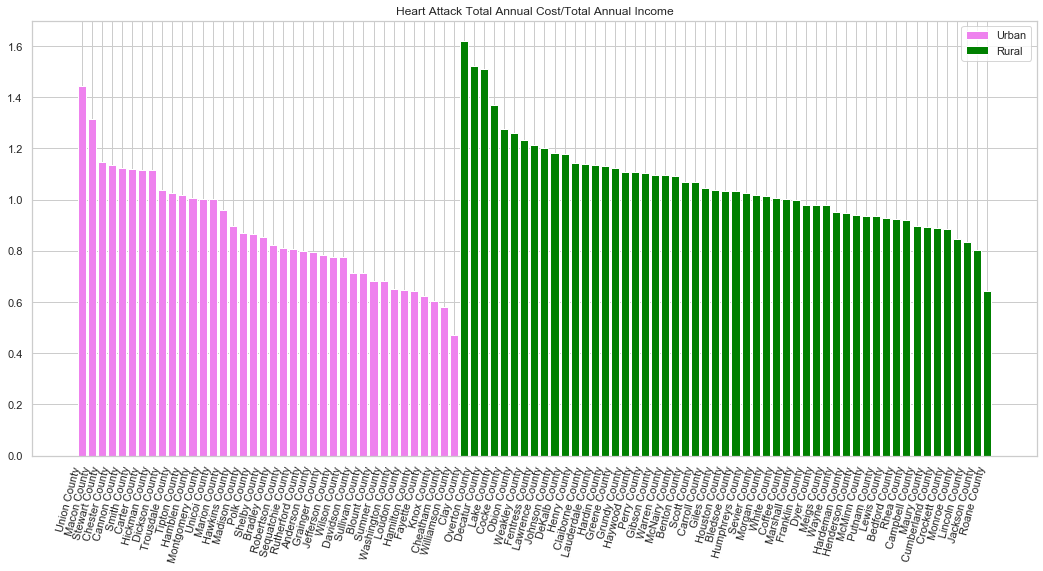

In [60]:
#color the bars by urban vs rural counties
plt.figure(figsize = (18, 8))
plt.bar(urban_ha.county, urban_ha.cost_income_ratio, color = 'violet')
plt.bar(rural_ha.county, rural_ha.cost_income_ratio, color = 'green')
plt.title('Heart Attack Total Annual Cost/Total Annual Income')
plt.legend(['Urban', 'Rural'])
plt.xticks(rotation = 75, ha = 'right');

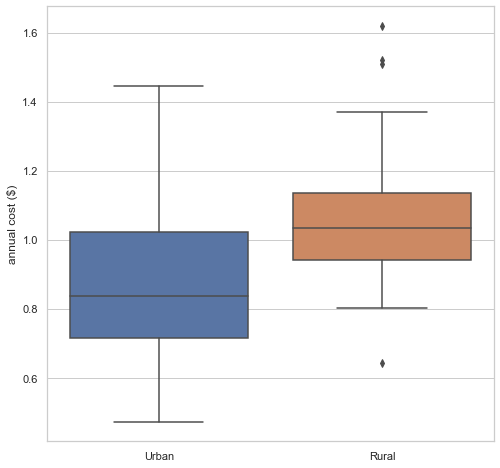

In [61]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = tn_ha_costs2.urban, y = tn_ha_costs2.cost_income_ratio, order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('annual cost ($)');

In [62]:
urban_cancer = tn_cancer_costs2.loc[tn_cancer_costs2.urban == 'Urban'].sort_values('cost_income_ratio', ascending = False)
rural_cancer = tn_cancer_costs2.loc[tn_cancer_costs2.urban == 'Rural'].sort_values('cost_income_ratio', ascending = False)

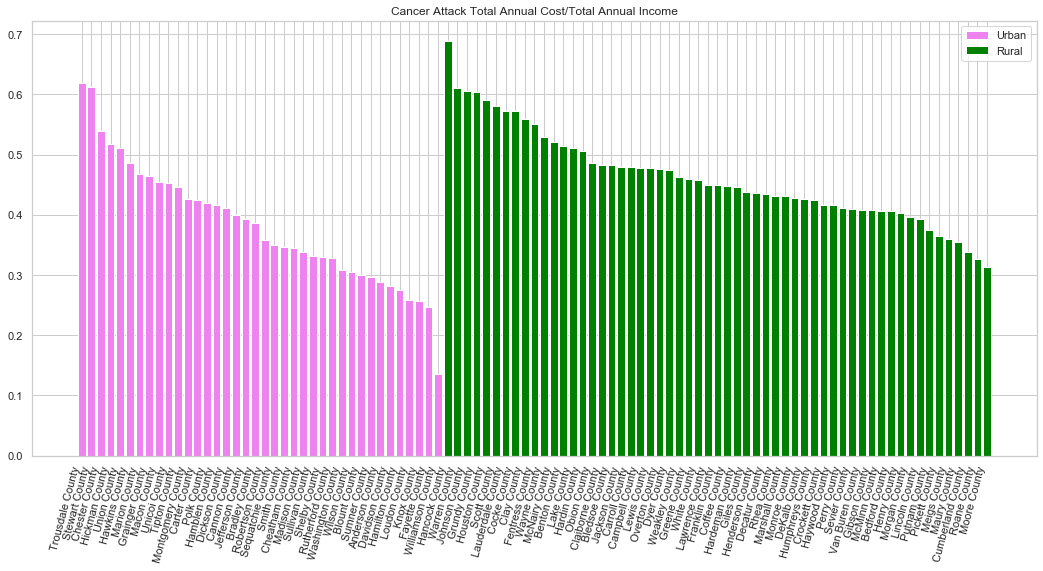

In [63]:
plt.figure(figsize = (18, 8))
plt.bar(urban_cancer.county, urban_cancer.cost_income_ratio, color = 'violet')
plt.bar(rural_cancer.county, rural_cancer.cost_income_ratio, color = 'green')
plt.title('Cancer Attack Total Annual Cost/Total Annual Income')
plt.legend(['Urban', 'Rural'])
plt.xticks(rotation = 75, ha = 'right');

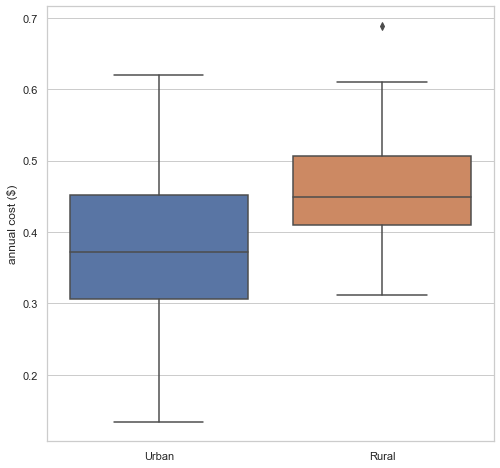

In [64]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = tn_cancer_costs2.urban, y = tn_cancer_costs2.cost_income_ratio, order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('annual cost ($)');

In [65]:
print(len(tn_cancer_costs2.analysis_value))
print(len(tn_ha_costs2.analysis_value))

95
91


### merge the cancer and heart attack cost data and create scatterplots to see if the total cost for cancer is correlated with the total cost for heart attacks

In [66]:
tn_cancer_costs2.loc[~tn_cancer_costs2.county.isin(tn_ha_costs2.county)]

,county,urban,analysis_value,avg_income,cost_income_ratio
12,Hancock County,Rural,22515,32717.0,0.688174
85,Moore County,Rural,16978,54317.0,0.312572
87,Pickett County,Rural,16768,46015.0,0.364403
91,Van Buren County,Rural,16244,39762.0,0.408531


In [67]:
#tn_cancer_costs3 = tn_cancer_costs2.drop(index = [12, 85, 87, 91])

In [68]:
tn_cancer_cost3 = tn_cancer_costs2.drop(index = [33,63,68,87])

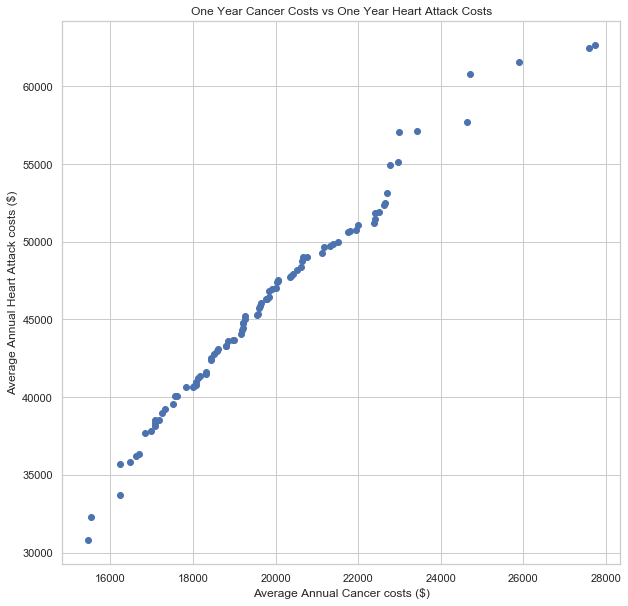

In [69]:
plt.figure(figsize = (10, 10))

plt.scatter(tn_cancer_cost3.analysis_value, tn_ha_costs2.analysis_value, marker = 'o')
plt.title('One Year Cancer Costs vs One Year Heart Attack Costs')
plt.xlabel('Average Annual Cancer costs ($)')
plt.ylabel('Average Annual Heart Attack costs ($)');

### choropleth time!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize 

%matplotlib inline

In [2]:
counties = gpd.read_file('../data/county/tn_counties.shp')
counties.head(2)

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,..."
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,..."


In [3]:
counties.crs

{'init': 'epsg:2274'}

In [4]:
counties = counties.to_crs(epsg = 4326)
counties.crs

{'init': 'epsg:4326', 'no_defs': True}

### First we'll make map the counties with a _qualitative_ color map

KeyError: 'NAME'

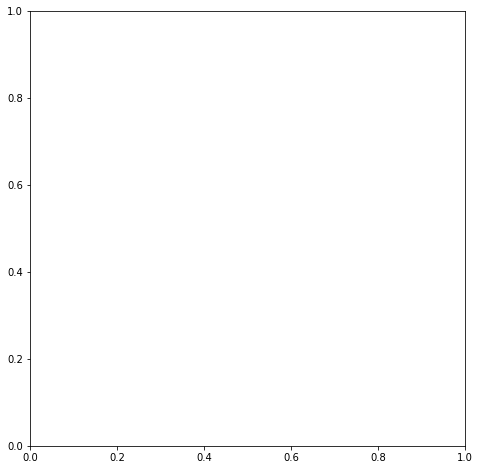

In [5]:
fig, ax = plt.subplots(figsize = (15, 8))
counties.plot(ax = ax, column = 'NAME', cmap = 'Set3');

### Next we'll merge the cancer data with the county GeoDataFrame

In [ ]:
# first we drop the word *County* from the cancer data using string slicing
tn_cancer_costs2.county = tn_cancer_costs2.county.str[:-7]

# now we can merge, making sure the counties GeoDataFrame is on the left so our result is a GeoDataFrame
geo_cancer = pd.merge(counties, tn_cancer_costs2, left_on = 'NAME', right_on = 'county')
geo_cancer.head(2)

### Now a choropleth of cancer cost/income ratios
 - Set up a normalized _sequential_ color map for our chorlopleth
 - define the fig and ax
 - create a divider for the colorbar (because the default legend is wacky)
 - draw the map

In [ ]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer.cost_income_ratio.min(), geo_cancer.cost_income_ratio.max()), 
      cmap = 'BuPu')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer.plot(ax = ax, column = 'cost_income_ratio', cmap = 'BuPu')
ax.set_title('Ratio of 2017 Annual Cancer Cost to 2016 Annual Income - Tennessee Counties');

##### Week 5:
Building a Classifier
- Overview of Machine Learning
- Feature Engineering
- Scikit Learn's `RandomForestClassifier` 
- One hot encoding to encode categorical variables for use in a model
- Creating training and test data

Coding tasks:
 - What does the exploratory data analysis suggest about our question?
 - Using existing features in the provided datasets or engineering new features from the existing ones, build a `RandomForestClassifier`
    - Use `pd.get_dummies()` with your explanatory variables to encode any categorical values. Features for your model must be numeric.
     - Split the data into train and test sets.
    - Build and evaluate a random forest classifier.
 - Think about other potential features that might explain cost disparities. Can you find additional data that may improve your classifier? The number of healthcare providers in a county, the number of healthcare facilities in a county, unemployment rates, or the per-person-income (which can be approximated using the number of exemptions in the IRS data) are potential features. Can you think of others?

### Build a logistic regression model to predict whether a county’s costincome ratio is above or below the mean for TN (hint: first create a label for the data that answers that).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

### Reading in, filtering, and examining the heart attack cost disparities data

In [2]:
# your path to the data file may vary!

ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv') 
tn_ha_costs = ha_costs_df.loc[ha_costs_df.state == 'TENNESSEE']
print(tn_ha_costs.shape)
print(tn_ha_costs.head(2))

(91, 17)
      year geography             measure         adjustment      analysis  \
2030  2017    County  Average total cost  Unsmoothed actual  Base measure   
2031  2017    County  Average total cost  Unsmoothed actual  Base measure   

                          domain                    condition primary_sex  \
2030  Primary chronic conditions  Acute myocardial infarction         All   
2031  Primary chronic conditions  Acute myocardial infarction         All   

     primary_age     primary_dual   fips           county      state  urban  \
2030         All  Dual & non-dual  47001  Anderson County  TENNESSEE  Urban   
2031         All  Dual & non-dual  47003   Bedford County  TENNESSEE  Rural   

     primary_race primary_denominator  analysis_value  
2030          All           undefined           42749  
2031          All           undefined           43661  


### Now getting the cancer data

In [3]:
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')
tn_cancer_costs = cancer_costs_df.loc[cancer_costs_df.state == 'TENNESSEE']
print(tn_cancer_costs.shape)
print(tn_cancer_costs.head(2))

(95, 17)
      year geography             measure         adjustment      analysis  \
2396  2017    County  Average total cost  Unsmoothed actual  Base measure   
2397  2017    County  Average total cost  Unsmoothed actual  Base measure   

                          domain                                   condition  \
2396  Primary chronic conditions  Cancer, Colorectal, Breast, Prostate, Lung   
2397  Primary chronic conditions  Cancer, Colorectal, Breast, Prostate, Lung   

     primary_sex primary_age     primary_dual   fips           county  \
2396         All         All  Dual & non-dual  47001  Anderson County   
2397         All         All  Dual & non-dual  47003   Bedford County   

          state  urban primary_race primary_denominator  analysis_value  
2396  TENNESSEE  Urban          All           undefined           15454  
2397  TENNESSEE  Rural          All           undefined           19219  


### Getting the income data and cleaning it a bit

In [4]:
income_df = pd.read_csv('../data/irs_county_2016.csv')
tn_income = income_df.loc[income_df.STATE == 'TN']
tn_income.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510


In [5]:
tn_income = tn_income[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
tn_income.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']


### Week two coding tasks
#### Replacing coded values in the `income_bucket` column with descriptive text
- create a dictionary mapping codes to descriptions
- use `replace()` to update the df with text

In [6]:
income_dict = {0:'Total', 1: 'Under $1', 2: 'Between 1 and $10,000', 3: 'Between 10,000 and $25,000',
              4: 'Between 25,000 and $50,000', 5: 'Between 50,000 and $75,000', 
               6: 'Between 75,000 and $100,000', 7: 'Between 100,000 and $200,000', 
               8:'$200,000 or more'}

In [7]:
tn_income.income_bucket = tn_income.income_bucket.replace(income_dict)
tn_income.head(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


#### Creating a new df that aggregates by county to get the totals for each county

In [8]:
income_county_agg = tn_income.groupby('county').agg('sum').reset_index()
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023


In [9]:
income_county_agg['avg_income'] = round(income_county_agg.total_inc_amt * 1000 / income_county_agg.returns_with_total_inc, 0)
income_county_agg.head(3)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53617.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47308.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41485.0


### Create a merged DataFrame for Heart Attack Costs and Income, keeping just `county`, `urban`, `analysis_value`, and `avg_income`; then do the same for Cancer Costs

In [10]:
# we only need the county and the average income from income_county_agg
county_incomes = income_county_agg[['county', 'avg_income']]
county_incomes.head(2)

,county,avg_income
0,Anderson County,53617.0
1,Bedford County,47308.0


In [11]:
# we only need county, urban, and analysis_value columns from the heart attack costs
tn_ha_costs = tn_ha_costs[['county', 'urban', 'analysis_value']]

# Merge HA and income data

In [158]:
tn_ha_costs2 = pd.merge(tn_ha_costs, county_incomes, on= 'county', how = 'left')
tn_ha_costs2.head(2)

,county,urban,analysis_value,avg_income
0,Anderson County,Urban,42749,53617.0
1,Bedford County,Rural,43661,47308.0


In [159]:
tn_ha_costs2['cost_income_ratio'] = tn_ha_costs2.analysis_value / tn_ha_costs2.avg_income
tn_ha_costs2.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson County,Urban,42749,53617.0,0.797303
1,Bedford County,Rural,43661,47308.0,0.922909
2,Benton County,Rural,44423,41485.0,1.070821
3,Bledsoe County,Rural,41240,39919.0,1.033092
4,Blount County,Urban,38968,56978.0,0.683913


# Merge cancer data and income data

In [14]:
# we only need county, urban, and analysis_value columns from the cancer costs
tn_cancer_costs = tn_cancer_costs[['county', 'urban', 'analysis_value']]

In [15]:
tn_cancer_costs2 = pd.merge(tn_cancer_costs, county_incomes, on= 'county', how = 'left')
tn_cancer_costs2.head(2)

,county,urban,analysis_value,avg_income
0,Anderson County,Urban,15454,53617.0
1,Bedford County,Rural,19219,47308.0


In [16]:
tn_cancer_costs2['cost_income_ratio'] = tn_cancer_costs2.analysis_value / tn_cancer_costs2.avg_income
tn_cancer_costs2.describe()

,analysis_value,avg_income,cost_income_ratio
count,95.000000,95.000000,95.000000
mean,19757.894737,47854.631579,0.430497
std,2436.304533,11760.400939,0.097032
min,15454.000000,32717.000000,0.134748
25%,18103.500000,42051.500000,0.362230
50%,19563.000000,44666.000000,0.428809
75%,21153.000000,50494.500000,0.480751
max,27740.000000,130072.000000,0.688174


In [17]:
tn_ha_costs2.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson County,Urban,42749,53617.0,0.797303
1,Bedford County,Rural,43661,47308.0,0.922909
2,Benton County,Rural,44423,41485.0,1.070821
3,Bledsoe County,Rural,41240,39919.0,1.033092
4,Blount County,Urban,38968,56978.0,0.683913


In [18]:
tn_cancer_costs2.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson County,Urban,15454,53617.0,0.288229
1,Bedford County,Rural,19219,47308.0,0.406253
2,Benton County,Rural,21315,41485.0,0.513800
3,Bledsoe County,Rural,19250,39919.0,0.482227
4,Blount County,Urban,17073,56978.0,0.299642


#### So far from exploratory data analysis cost of care is high in rural compared to urban

#### logistic regression model for myocardial infarction costs

- create target column (1 for cost-income ratio above the mean 0 if at or below the mean)
- encode the urban column
- split train/test
- use urban column to predict

In [19]:
# create target variable -ha data
ha_cost_income_ratio_mean = tn_ha_costs2.cost_income_ratio.mean()
tn_ha_costs2['cost_ratio_above_mean'] = [1 if ratio > ha_cost_income_ratio_mean else 0 for ratio in tn_ha_costs2.cost_income_ratio]

In [20]:
tn_ha_costs2.cost_ratio_above_mean.value_counts(normalize = True)

1    0.527473
0    0.472527
Name: cost_ratio_above_mean, dtype: float64

In [21]:
tn_ha_costs2.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean
0,Anderson County,Urban,42749,53617.0,0.797303,0
1,Bedford County,Rural,43661,47308.0,0.922909,0


In [95]:
# encode urban/rural
tn_ha_costs2 = pd.get_dummies(tn_ha_costs2, columns = ['urban'], drop_first = True)
tn_ha_costs2.head(2)

,county,analysis_value,avg_income,cost_income_ratio,cost_ratio_above_mean,urban_Urban
0,Anderson County,42749,53617.0,0.797303,0,1
1,Bedford County,43661,47308.0,0.922909,0,0


In [ ]:
#one bracket slices the column, df and 2 brackets subsets, series
X = tn_ha_costs2[['urban_Urban']]
y = tn_ha_costs2.cost_ratio_above_mean

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

#### the naive model (predicting the cost-income ratio above the mean for all cases) would have accuracy .527473

In [ ]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

In [ ]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]
print('Area Under Curve:', metrics.roc_auc_score(y_test, y_pred_prob))

#### Let's add another predictor - the Health Factors z-score from the county health rankings: [Robert Wood Johnson Foundation](https://www.countyhealthrankings.org)

![health factors](../data/health_factors.png)

In [ ]:
health_rankings = pd.read_excel('../data/2018 County Health Rankings Tennessee Data - v3.xls', 
                                sheet_name = 'Outcomes & Factors Rankings',
                               header = [0,1])

In [ ]:
health_rankings.head(2)

In [ ]:
health_rankings.columns = ['fips', 'state', 'county', 'outcomes_z_score', 'outcomes_rank', 'factors_z_score', 'factors_rank']
health_rankings.head()

In [ ]:
health_factors = health_rankings[['county', 'factors_z_score']]

#### let's see if `health_factors` and `tn_ha_costs2` can be merged as is

In [ ]:
#remove the word county from the county column
tn_ha_costs2.county = tn_ha_costs2.county.str[0:-7]
tn_ha_costs2.head(2)

In [ ]:
ha_with_health_factors =pd.merge(tn_ha_costs2, health_factors, on = 'county', how = 'left')
ha_with_health_factors.head(2)

In [ ]:
X = ha_with_health_factors[['urban_Urban', 'factors_z_score']]
y = tn_ha_costs2.cost_ratio_above_mean

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

#### try #uninsured from the 2018 County Health Rankings Tennessee Data

In [96]:
health_rankings = pd.read_excel('../data/2019 County Health Rankings Tennessee Data - v1.xls', 
                                sheet_name = 'Uninsured',
                               header = [0,1])

In [97]:
health_rankings.head(2)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0   Uninsured  \
                FIPS              State             County # Uninsured   
0              47000          Tennessee                NaN      581927   
1              47001          Tennessee           Anderson        5550   

                                                    
  % Uninsured 95% CI - Low 95% CI - High   Z-Score  
0   10.638262    10.280816     10.995709       NaN  
1    9.202454     7.891816     10.513092 -1.307709

In [98]:
health_rankings.columns = ['fips', 'state', 'county', '#Uninsured', '%Uninsured', '95%CI_low', '95%CI_high','z-score']
health_rankings.head()

,fips,state,county,#Uninsured,%Uninsured,95%CI_low,95%CI_high,z-score
0,47000,Tennessee,NaN,581927,10.638262,10.280816,10.995709,NaN
1,47001,Tennessee,Anderson,5550,9.202454,7.891816,10.513092,-1.307709
2,47003,Tennessee,Bedford,5173,12.993570,11.206336,14.780804,1.192019
3,47005,Tennessee,Benton,1431,11.811804,10.143718,13.479889,0.412804
4,47007,Tennessee,Bledsoe,1331,14.038604,11.893923,16.183284,1.881077


In [ ]:
health_factors = health_rankings[['county', '#Uninsured']]

#### let's see if health_factors and tn_ha_costs2 can be merged as is

In [ ]:
tn_ha_costs2.head(2)

In [ ]:
tn_ha_costs2.county = tn_ha_costs2.county.str[0:-7]

In [ ]:
tn_ha_costs2.head(2)

In [ ]:
# create target variable
ha_cost_income_ratio_mean = tn_ha_costs2.cost_income_ratio.mean()
tn_ha_costs2['cost_ratio_above_mean'] = [1 if ratio > ha_cost_income_ratio_mean else 0 for ratio in tn_ha_costs2.cost_income_ratio]

In [ ]:
tn_ha_costs2.cost_ratio_above_mean.value_counts(normalize = True)

In [ ]:
tn_ha_costs2.head(2)

In [ ]:
# encode urban/rural
tn_ha_costs2 = pd.get_dummies(tn_ha_costs2, columns = ['urban'], drop_first = True)
tn_ha_costs2.head(2)

In [ ]:
ha_with_health_factors =pd.merge(tn_ha_costs2, health_factors, on = 'county', how = 'left')
ha_with_health_factors.head(2)

In [ ]:
X = ha_with_health_factors[['urban_Urban', '#Uninsured']]
y = tn_ha_costs2.cost_ratio_above_mean

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

In [151]:
health_rankings = pd.read_excel('../data/2018 County Health Rankings Tennessee Data - v3.xls', 
                                sheet_name = 'All factors',
                               header = [0,1])

In [152]:
health_rankings.head(2)

,FIPS,State,County,Health factor z-score,Smoking Z-Score,Obesity Z-Score,Physical inactivity Z-Score,UninsuredZ-Score,Primary care physicians Z-Score,Diabetes monitoring Z-Score,...,Children in poverty Z-Score,Air pollution - particulate matter Z-Score,Drinking water violations Z-Score,Quality of life,Limited access to healthy food,Insufficient sleep,Frequent physical distress,Frequent mental distress,Social & Economic Factors,poor mental health
,47000,Tennessee,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Unnamed: 9_level_1,...,Unnamed: 13_level_1,Unnamed: 14_level_1,Unnamed: 15_level_1,Unnamed: 16_level_1,Unnamed: 17_level_1,Unnamed: 18_level_1,Unnamed: 19_level_1,Unnamed: 20_level_1,Unnamed: 21_level_1,Unnamed: 22_level_1
0,47001,Tennessee,Anderson,-0.423951,-0.684053,-0.929617,0.392063,-1.310826,-0.599290,-0.576488,...,-0.640339,1.764502,-0.562212,-0.168777,7031.463453,35.819313,13.911728,13.550779,-0.17920,-0.345931
1,47003,Tennessee,Bedford,0.065383,-0.359034,-0.591089,0.091692,2.608988,0.422541,-0.249580,...,-0.503363,0.462178,1.759967,0.041025,2983.991309,36.252518,14.448689,13.911517,-0.08485,-0.202414


In [153]:
list(health_rankings.columns) 

[('FIPS', '47000'),
 ('State', 'Tennessee'),
 ('County', 'Unnamed: 2_level_1'),
 ('Health factor z-score', 'Unnamed: 3_level_1'),
 ('Smoking Z-Score', 'Unnamed: 4_level_1'),
 ('Obesity Z-Score', 'Unnamed: 5_level_1'),
 ('Physical inactivity Z-Score', 'Unnamed: 6_level_1'),
 ('UninsuredZ-Score', 'Unnamed: 7_level_1'),
 ('Primary care physicians Z-Score', 'Unnamed: 8_level_1'),
 ('Diabetes monitoring Z-Score', 'Unnamed: 9_level_1'),
 ('Mammography screening Z-Score', 'Unnamed: 10_level_1'),
 ('High school graduation Z-Score', 'Unnamed: 11_level_1'),
 ('Unemployment Z-Score', 'Unnamed: 12_level_1'),
 ('Children in poverty Z-Score', 'Unnamed: 13_level_1'),
 ('Air pollution - particulate matter Z-Score', 'Unnamed: 14_level_1'),
 ('Drinking water violations Z-Score', 'Unnamed: 15_level_1'),
 ('Quality of life', 'Unnamed: 16_level_1'),
 ('Limited access to healthy food', 'Unnamed: 17_level_1'),
 ('Insufficient sleep', 'Unnamed: 18_level_1'),
 ('Frequent physical distress', 'Unnamed: 19_level_

In [154]:
health_rankings.columns = ['fips', 'state', 'county', 'health factor', 'smoking','obesity','physical_inactivity','uninsurance','primary_care_physician','diabetes','mammogram_screening','high_school_grad','unemployment','children_in_poverty','air_pollution','drinking_water_violation','quality_of_life','limited_access_to_healthy_food','insufficient_Sleep','frequent_physical_distress','frequent_mental_distress','socio_eco_factors','poor_mental_health']

health_rankings.head(2)

,fips,state,county,health factor,smoking,obesity,physical_inactivity,uninsurance,primary_care_physician,diabetes,...,children_in_poverty,air_pollution,drinking_water_violation,quality_of_life,limited_access_to_healthy_food,insufficient_Sleep,frequent_physical_distress,frequent_mental_distress,socio_eco_factors,poor_mental_health
0,47001,Tennessee,Anderson,-0.423951,-0.684053,-0.929617,0.392063,-1.310826,-0.599290,-0.576488,...,-0.640339,1.764502,-0.562212,-0.168777,7031.463453,35.819313,13.911728,13.550779,-0.17920,-0.345931
1,47003,Tennessee,Bedford,0.065383,-0.359034,-0.591089,0.091692,2.608988,0.422541,-0.249580,...,-0.503363,0.462178,1.759967,0.041025,2983.991309,36.252518,14.448689,13.911517,-0.08485,-0.202414


In [142]:
tn_ha_costs2.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson,Urban,42749,53617.0,0.797303
1,Bedford,Rural,43661,47308.0,0.922909
2,Benton,Rural,44423,41485.0,1.070821
3,Bledsoe,Rural,41240,39919.0,1.033092
4,Blount,Urban,38968,56978.0,0.683913


In [160]:
tn_ha_costs2.county = tn_ha_costs2.county.str[0:-7]

In [141]:
tn_ha_costs2= tn_ha_costs2[['county','urban','cost_ratio_above_mean']]
tn_ha_costs2.head()

KeyError: "['cost_ratio_above_mean'] not in index"

In [63]:
# encode urban/rural
tn_ha_costs2 = pd.get_dummies(tn_ha_costs2, columns = ['urban'], drop_first = True)
tn_ha_costs2.head(2)

,county,cost_ratio_above_mean,urban_Urban
0,Anderson,0,1
1,Bedford,0,0


In [161]:
ha_with_health_factors =pd.merge(tn_ha_costs2, health_rankings, on = 'county', how = 'left')
ha_with_health_factors.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio,fips,state,health factor,smoking,obesity,...,children_in_poverty,air_pollution,drinking_water_violation,quality_of_life,limited_access_to_healthy_food,insufficient_Sleep,frequent_physical_distress,frequent_mental_distress,socio_eco_factors,poor_mental_health
0,Anderson,Urban,42749,53617.0,0.797303,47001,Tennessee,-0.423951,-0.684053,-0.929617,...,-0.640339,1.764502,-0.562212,-0.168777,7031.463453,35.819313,13.911728,13.550779,-0.17920,-0.345931
1,Bedford,Rural,43661,47308.0,0.922909,47003,Tennessee,0.065383,-0.359034,-0.591089,...,-0.503363,0.462178,1.759967,0.041025,2983.991309,36.252518,14.448689,13.911517,-0.08485,-0.202414


In [103]:
ha_with_health_factors_subset=ha_with_health_factors.drop(['county','fips','state','drinking_water_violation','mammogram_screening','high_school_grad','quality_of_life','frequent_mental_distress','frequent_physical_distress','socio_eco_factors','children_in_poverty'], axis=1)



In [46]:
#ha_with_health_factors_subset=ha_with_health_factors.drop(['county','cost_income_ratio','analysis_value','avg_income','fips', 'state','premature death','low birthweight','food environment index','excessive drinking', 'STD infection','teen birth','dentists','diabetes','mammo screening','some college','drinking water violations','violent Crime','injury deaths'], axis=1)

#ha_with_health_factors_subset=ha_with_health_factors[['cost_ratio_above_mean','health factor','smoking','access to exercise','pimary care physician','mental health providers','unemployment','children in single parent house']]
#ha_with_health_factors_subset.head()


,cost_ratio_above_mean,health factor,smoking,access to exercise,pimary care physician,mental health providers,unemployment,children in single parent house
0,0,-0.423951,-0.684053,-0.557062,-0.599290,-0.284185,-0.635305,1.072621
1,0,0.065383,-0.359034,0.085192,0.422541,-0.024865,-0.541360,0.560237
2,1,0.438683,0.242617,0.334394,0.930870,0.468397,1.471996,-0.212758
3,1,0.825123,1.639488,1.374484,1.319472,0.714398,1.264018,0.260598
4,0,-0.727221,-1.469051,-0.951406,-0.799757,-0.596130,-1.093055,-1.054631


#### Air pollution

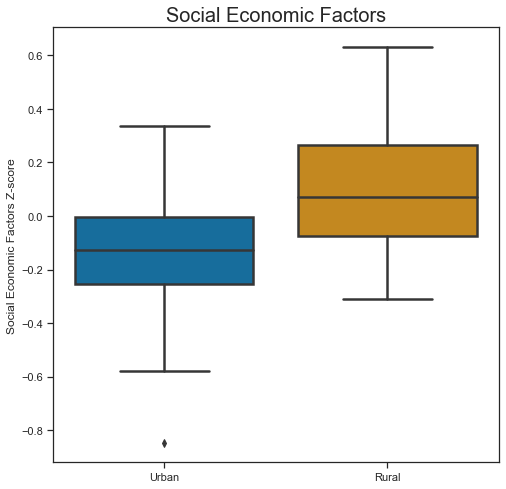

In [184]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = ha_with_health_factors.urban, 
            y = ha_with_health_factors.socio_eco_factors, 
            linewidth=2.5,
            palette="colorblind")
plt.xlabel("", fontsize=16)
plt.ylabel('Social Economic Factors Z-score', fontsize=12)
plt.title('Social Economic Factors',fontsize=20);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


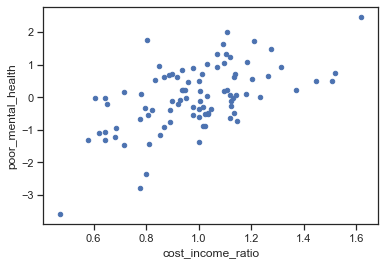

In [162]:
ha_with_health_factors.plot(kind = 'scatter', x = 'cost_income_ratio', y = 'poor_mental_health');

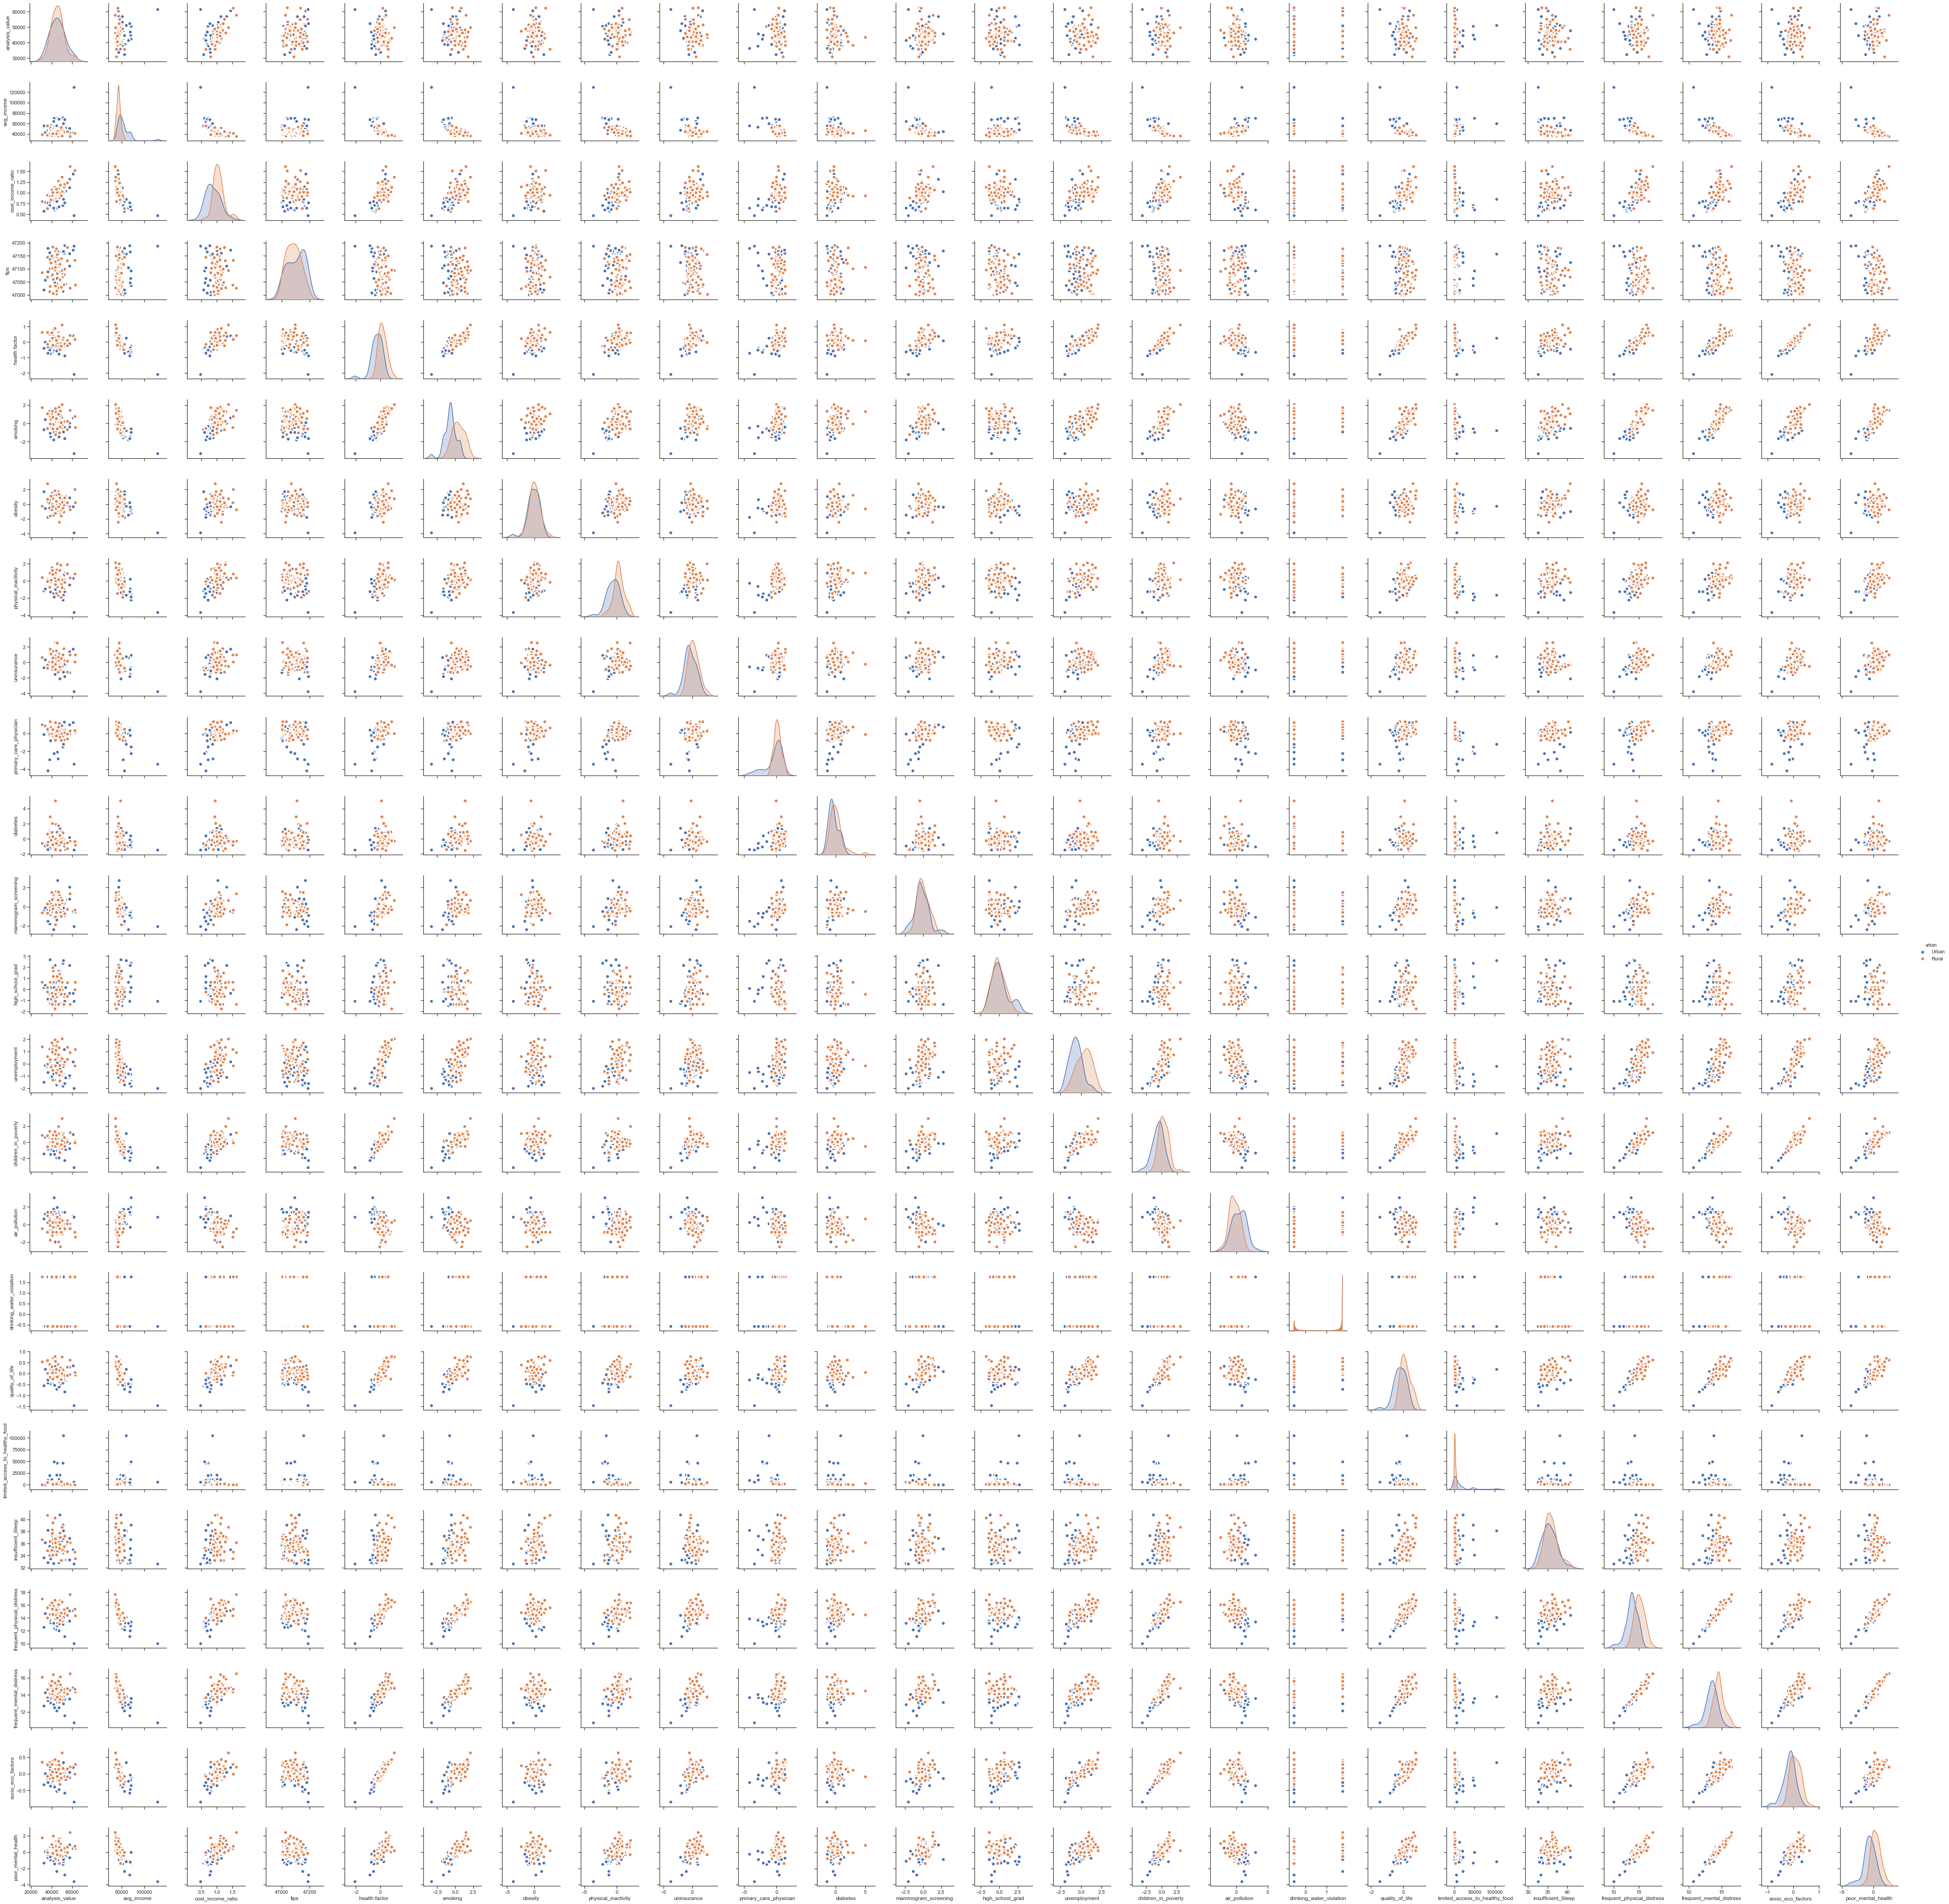

In [165]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(ha_with_health_factors, hue='urban',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5));

In [104]:
X = ha_with_health_factors_subset.drop(columns='cost_ratio_above_mean')
y = tn_ha_costs2.cost_ratio_above_mean

In [129]:
X.head()

,urban_Urban,poor or fair health,poor physical health,poor mental health,smoking,obesity,physical inactivty,access to exercise,alcohol impaired driving,uninsurance,...,unemployment,children in poverty,income inequality,children in single parent house,social association,air pollution,severe housing problems,driving alone to work,long commute,health factor
0,1,-0.509523,-0.473361,-0.345931,-0.684053,-0.929617,0.392063,-0.557062,0.263554,-1.310826,...,-0.635305,-0.640339,0.644706,1.072621,-1.281038,1.764502,-0.410335,0.860575,-0.549772,-0.423951
1,0,0.453757,-0.095082,-0.202414,-0.359034,-0.591089,0.091692,0.085192,1.888644,2.608988,...,-0.541360,-0.503363,-1.098432,0.560237,0.563093,0.462178,0.758064,-1.041853,-0.383997,0.065383
2,0,0.320910,1.073317,1.335083,0.242617,0.509129,0.752508,0.334394,0.684542,1.223090,...,1.471996,0.653315,1.402150,-0.212758,-0.873195,-1.026192,0.477849,-0.206014,-0.954999,0.438683
3,0,0.644745,0.814403,0.046077,1.639488,-0.591089,0.452137,1.374484,2.694298,1.332792,...,1.264018,1.140338,1.383617,0.260598,1.736836,-0.840146,1.156690,-1.660449,1.347430,0.825123
4,1,-1.441777,-0.780233,-0.957957,-1.469051,-0.040980,-1.259976,-0.951406,-0.242747,-0.875381,...,-1.093055,-1.477409,-0.507917,-1.054631,-0.195165,0.648224,-0.004989,0.268290,-0.218222,-0.727221


In [ ]:
y.head()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

We see some improvement over using a single tree, but we could do better. Random forests have a lot of hyperparameters that can be tuned to improve out model. Here are a few of these parameters:

* **n_estimators:** Number of decision trees to train. Default is 10. More trees = less variance, but slower to train and predict
* **max_depth:** Maximum depth (number of splits). By default, there is no max depth.
* **min_samples_leaf:** Minimum number of samples per leaf. Setting this higher keeps the decision trees from paying too much attention to any single data point.

These parameters can be tuned to try to improve the model that you get, and there are ways to automatically tune these parameters. See, for example, sklearn's GridSearchCV or RandomSearchCV.

In [127]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 4, min_samples_leaf = 10, criterion ='entropy',random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [128]:
#training set accuracy
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.7794117647058824


In [129]:
#test set accuracy
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.782608695652174


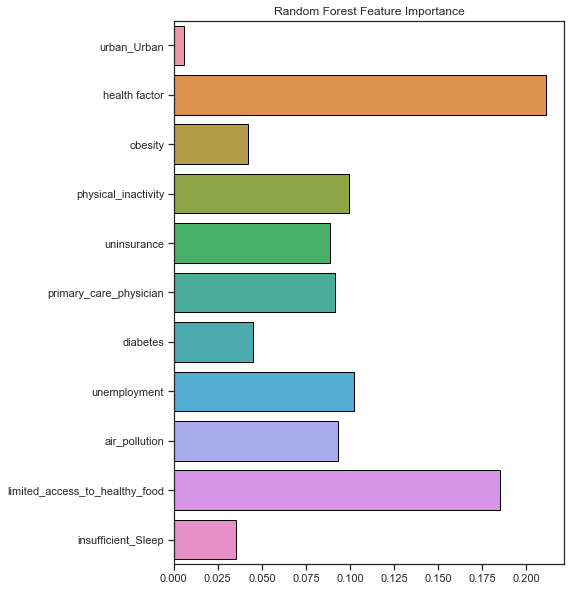

In [130]:
fig, ax = plt.subplots(figsize = (7,10))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');